(Placeholder for your group #)

(Placeholder for your names)

(Placeholder for your i-numbers)

**Use of genAI tools (e.g. chatGPT), websites (e.g. stackoverflow)**: *list websites where you found code (or other info) as well as include information on how you used genAI tools*

# Data Analysis, Clinic 2

By completing and delivering the clinic tasks you will know how to :

- Preprocess data and make it amenable to statistical analysis and machine learning models;
- Train and test out-of-the-box machine learning models in `sklearn`;
- Carry out simple logistic regression analysis;
- Evaluate classification models based on different metrics;
- Assess how your model performance can improve
- Reflect on the greater impact of the models you develop

---

## Important Dates

- Homework release: Fri, 7th Feb
- **Homework due**: Mon, 17th Feb late night (wildcards possible, apply to the group)

---

##  Some rules

* We have provided `TODO` comments in the code cells that you need to fill out with your solutions. For some questions, we have also provided `Your response` comments, where you should provide a textual answer.

* You are allowed to use any built-in Python library that is included in the `requirements.txt` for this homework. If you use any additional library, this may complicate the grading process, and we reserve the right to penalize your grade for unnecessary complexity of the solution. All the questions can be solved with the libraries in `requirements.txt`.

* Make sure that you include a proper amount/mix of comments, results and code. More specifically, be sure to provide a concise textual description of your thought process, the assumptions you made, the solution you implemented, and explanations for your answers. A notebook that only has code cells will not suffice. To avoid confusion: use short comments for longer code answers.

* Back up any hypotheses and claims with data, since this is an important aspect of the course.

* Please write all your comments in English, and use meaningful variable names (as possible) in your code. 

* In the end, make sure that all cells are executed properly and everything you need to show is in your (execucted) notebook. We will not run your notebook for you! 

- In continuation to the previous point, interactive plots, such as those generated using the ‘plotly’ package, should be strictly avoided! Make sure to print results and/or dataframes that confirm you have properly addressed the task.

* You are asked to deliver **only your executed notebook file, .ipnyb** and nothing else. If you deliver other files, we will not grade anything.

* Honor code applies to these tasks. If you are not certain about an action, consult with Jerry.

**A Note from Jerry on using Language Models (LMs)**

If you try hard enough, you will likely get away with cheating (that does not only apply to LMs). Fortunately, my job is not to police, but rather to educate you. So, please consider the following:

I assume that you are taking this course to learn something! LMs are not always right ([they often fail in silly ways](https://community.openai.com/t/why-9-11-is-larger-than-9-9-incredible/869824/4)). This course should prepare you to detect when they are wrong!

I don't restrict the use of LMs because I see the value of being helped when coding (esp. in the context of pandas dataframes nightmare :)). Based on what we saw last year in your notebooks, it's pretty clear when you "copy" some code and then you struggle to interpret the results. This is the essence of this course and of the skills you should try build for yourself: Many people can run fancy models these days but not many people can interpret the results correctly. Try to be the latter ones.



---


## Grading 
- The homework has a total of 100 points, distributed as follows:
    - Part 1: Data Preprocessing (20 points)
    - Part 2: Linear Regression (30 points)
    - Part 3: Supervised Learning (40 points)
    - Part 4: The Aftermath (5 points)

## Context

Within DACS, you are excited to start an internship as a data scientist.
After rounds of interviews, you have been selected to work with the biggest car dealership in the Netherlands !

Your mentor at the company Jerasimosu, has explained to you that the company is interested in a pricing model for used cars. 

- Jerasimosu: "We have a lot of used cars in our inventory, and we need to determine the price at which we should sell these cars. We have some ideas about the factors that influence the price of a used car, but so far we have just been using our experience and intuition to determine the price of a used car. Sometimes it works, but probably we can do better and a more data-driven approach would also help our new employees in the sales team as they have less experience."

- You: "That sounds like a great project! What kind of data do we have?"

- Jerasimosu: "We sell all kinds of cars here, but maybe we can start with a specific brand and model. For example, the Toyota Corolla is the best-selling car worldwide in 2023, and we have a lot of data on it. We can start by analyzing the data on used Toyota Corolla cars. If it works well, we can extend the analysis to other brands."

The dataset contains the following columns:

- `Age`: Age of the car in months.
- `Mileage`: Number of distance the car has been driven. (km or miles)
- `FuelType`: Fuel type of the car (Petrol, Diesel, or CNG)
- `HP`: Horsepower
- `MetColor`: Is the color of the car metallic? (Yes=1, No=0)
- `Automatic`: Is the car automatic? (Yes=1, No=0)
- `CC`: Cylinder volume in cubic centimeters
- `Doors`: Number of doors
- `Weight`: Weight of the car in kilograms
- `Price`: Price of the car in euros


## Data

The data is provided in the `data` folder and it contains the following 3 csv files:
- `Task1-2.ToyotaCorolla.csv` for Part 1 and Part 2
- `Task3.ToyotaCorolla_sales_3months.csv` for Part 3

You should not use any other data source for this homework.

For some questions, you might need to slightly modify the data. But overall, you should avoid making any major changes to the data, which may affect your analysis.

## References:

The data is based on the ToyotaCorolla dataset from the UCI Machine Learning Repository [here](https://archive.ics.uci.edu/ml/datasets/Toyota+Corolla).
We have made some modifications to the original dataset, so please use the data provided in the `data` folder in the course repo.

## Task 1 (20 pts) - Get to know the data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import random
import sklearn

# fix random seed for reproducibility
np.random.seed(42)
random.seed(42)


**1.1 (2 pts)**: Load the data from the file `Task1-2.ToyotaCorolla-raw.csv` into a pandas DataFrame. Display the first 5 rows of the DataFrame. Hint: A naive loading of the data will raise an error. You will need to figure out how to load the data correctly. (Hint: localise which row is causing the error)

In [3]:
#TODO
# Try loading with different parameters
try:
    df = pd.read_csv("data\Task1-2.ToyotaCorolla.csv", on_bad_lines="skip", encoding="utf-8")
    print(df.head())  # Display first 5 rows
except Exception as e:
    print("Error encountered:", e)

# # If you still face issues, inspect the file manually
# with open("data/Task1-2.ToyotaCorolla-raw.csv", "r", encoding="utf-8") as file:
#     for _ in range(10):  # Print first 10 lines
#         print(file.readline().strip())

     Price   Age  Mileage FuelType    HP  MetColor  Automatic      CC  Doors  \
0  13500.0  23.0  46986.0   Diesel  90.0       1.0        0.0  2000.0    3.0   
1  11878.0  23.0  72937.0   Diesel  90.0       1.0        0.0  2000.0    3.0   
2  12050.0  24.0  41711.0   Diesel  90.0       1.0        0.0  2000.0    3.0   
3  12914.0  26.0  48000.0   Diesel  90.0       0.0        0.0  2000.0    3.0   
4  11878.0  30.0  38500.0   Diesel  90.0       0.0        0.0  2000.0    3.0   

   Weight Currency  
0  1165.0     EURO  
1  1165.0      CHF  
2  1165.0      CHF  
3  1165.0      CHF  
4  1170.0      CHF  


**1.2 (2 pts)**: Check if there are nan values in the Dataframe. If there are, try to find out which row is problematic and fix it. If you can't fix it, drop the row.

In [4]:
#TODO

# Check for NaN values
nan_summary = df.isna().sum()
print("Missing values per column:\n", nan_summary)

# Identify problematic rows
problematic_rows = df[df.isna().any(axis=1)]
print("Problematic rows:\n", problematic_rows)

Missing values per column:
 Price        0
Age          1
Mileage      1
FuelType     1
HP           1
MetColor     1
Automatic    1
CC           1
Doors        1
Weight       1
Currency     1
dtype: int64
Problematic rows:
                                                 Price  Age Mileage FuelType  \
905  8423.0;68;58860.0;Petrol;110;1;0;1600;3;1055;CHF  NaN     NaN      NaN   

     HP  MetColor  Automatic  CC  Doors  Weight Currency  
905 NaN       NaN        NaN NaN    NaN     NaN      NaN  


In [5]:
# Fix or drop NaN values
# # Option 1: Fill NaNs with a placeholder (if possible)
# df_filled = df.fillna(method="ffill")  # Forward fill (use previous row value)
# # df_filled = df.fillna(0)  # Alternatively, replace NaNs with 0

# Option 2: Drop problematic rows if they can't be fixed
df_cleaned = df.dropna()

# Display the cleaned DataFrame
print("Original DataFrame:\n", df.count())
print("Cleaned DataFrame:\n", df_cleaned.count())

Original DataFrame:
 Price        1436
Age          1435
Mileage      1435
FuelType     1435
HP           1435
MetColor     1435
Automatic    1435
CC           1435
Doors        1435
Weight       1435
Currency     1435
dtype: int64
Cleaned DataFrame:
 Price        1435
Age          1435
Mileage      1435
FuelType     1435
HP           1435
MetColor     1435
Automatic    1435
CC           1435
Doors        1435
Weight       1435
Currency     1435
dtype: int64


**1.3 (4 pts): Compute the mean, median of the `Price` column.**

- Compute the mean and median of the `Price` column. If you encounter error, try to understand why this error is happening and propose a solution.

Hint: Is all values in the `Price` column numerical?


In [6]:
#TODO
print(df_cleaned["Price"].describe())

count       1435
unique       311
top       7731.0
freq          94
Name: Price, dtype: object


In [7]:
# Clean the 'Price' column using regex
df_cleaned.loc[:, "Price"] = df_cleaned["Price"].astype(str).str.replace(r"[^\d.]", "", regex=True)

# Convert to numeric
df_cleaned["Price"] = pd.to_numeric(df_cleaned["Price"], errors="coerce")
print(df_cleaned["Price"].describe())

count    1.435000e+03
mean     1.073066e+13
std      4.064924e+14
min      3.758000e+03
25%      7.343000e+03
50%      8.595000e+03
75%      1.032300e+04
max      1.539850e+16
Name: Price, dtype: float64


C:\Users\Pavel Detvan\AppData\Local\Temp\ipykernel_26584\3578454741.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["Price"] = pd.to_numeric(df_cleaned["Price"], errors="coerce")


In [8]:
print(df_cleaned["Price"].isna().sum())

0


In [9]:
print(df_cleaned["Price"].dtype)

float64


In [10]:
print("median: ", df_cleaned["Price"].median())

median:  8595.0


In [11]:
# Save the cleaned dataset (optional)
df_cleaned.to_csv("ToyotaCorolla_cleaned.csv", index=False)

#TODO idk but when we clean the data sometimes the price doesnt make sense.
# Maybe drop these data?

In [12]:
print(df_cleaned.head().to_markdown())

|    |   Price |   Age |   Mileage | FuelType   |   HP |   MetColor |   Automatic |   CC |   Doors |   Weight | Currency   |
|---:|--------:|------:|----------:|:-----------|-----:|-----------:|------------:|-----:|--------:|---------:|:-----------|
|  0 |   13500 |    23 |     46986 | Diesel     |   90 |          1 |           0 | 2000 |       3 |     1165 | EURO       |
|  1 |   11878 |    23 |     72937 | Diesel     |   90 |          1 |           0 | 2000 |       3 |     1165 | CHF        |
|  2 |   12050 |    24 |     41711 | Diesel     |   90 |          1 |           0 | 2000 |       3 |     1165 | CHF        |
|  3 |   12914 |    26 |     48000 | Diesel     |   90 |          0 |           0 | 2000 |       3 |     1165 | CHF        |
|  4 |   11878 |    30 |     38500 | Diesel     |   90 |          0 |           0 | 2000 |       3 |     1170 | CHF        |


**1.4 (4 pts): Convert Units**

You notice that some prices are in CHF (Swiss Francs), while others are in EUR (Euros) or GBP (British Pounds). Additionally, for cars priced in GBP, the mileage is in miles rather than kilometers.

For consistency, convert all prices to EUR and all distances to kilometers.

- Exchange rates:
  - 1 CHF = 1.05 EUR
  - 1 GBP = 1.15 EUR
  - 1 mile = 1.61 km

Make the following conversions:
1. Convert prices in CHF or GBP to EUR, rounding to the nearest integer.
2. Convert distances in miles (for GBP cars) to kilometers, rounding to the nearest integer.
3. Drop the 'Currency' column.
4. Calculate the min, mean, median and max of the 'Price' and 'Distance' columns after the conversion.

In [13]:
print(df_cleaned["Mileage"].dtype)

object


In [14]:
#TODO
# Convert Prices to EUR based on 'Currency' column
def convert_price(row):
    if row["Currency"] == "CHF":
        return round(row["Price"] * 1.05)  # Convert CHF to EUR (real 1.06 13/02/25)
    elif row["Currency"] == "GBP":
        return round(row["Price"] * 1.15)  # Convert GBP to EUR (real 1.25 13/02/25)
    return row["Price"]  # Keep EUR

df_cleaned["Price"] = df_cleaned.apply(convert_price, axis=1)

# Clean 'Mileage' column
#df_cleaned["Mileage"] = df_cleaned["Mileage"].astype(str).str.replace(r'[^\d.]', '', regex=True)  # Remove non-numeric characters
df_cleaned["Mileage"] = pd.to_numeric(df_cleaned["Mileage"], errors="coerce")

# Convert miles to km for GBP currency
def convert_mileage(row):
    if row["Currency"] == "GBP":
        return round(row["Mileage"] * 1.61)  # Convert miles to km
    return row["Mileage"]  # Keep km

df_cleaned["Mileage"] = df_cleaned.apply(convert_mileage, axis=1)

# Drop 'Currency' column
df_cleaned.drop(columns=[ "Currency"], inplace=True)

# Compute statistics for 'Price' and 'Mileage'
price_stats = {
    "Statistics Price": df_cleaned["Price"].describe(),
    "Median Price": df_cleaned["Price"].median(),
}

mileage_stats = {
    "Statistics Mileage": df_cleaned["Mileage"].describe(),
    "Median Mileage": df_cleaned["Mileage"].median(),
}

# Display results
print("Price Statistics (in EUR):", df_cleaned["Price"].describe(), "\n", df_cleaned["Price"].median())
print("Mileage Statistics (in km):", df_cleaned["Mileage"].describe(), "\n", df_cleaned["Mileage"].median())


Price Statistics (in EUR): count    1.435000e+03
mean     1.234026e+13
std      4.674663e+14
min      3.946000e+03
25%      7.710000e+03
50%      9.025000e+03
75%      1.083900e+04
max      1.770827e+16
Name: Price, dtype: float64 
 9025.0
Mileage Statistics (in km): count      1434.000000
mean      68563.357043
std       37521.369412
min           1.000000
25%       43000.000000
50%       63455.000000
75%       87062.250000
max      243000.000000
Name: Mileage, dtype: float64 
 63455.0


C:\Users\Pavel Detvan\AppData\Local\Temp\ipykernel_26584\1980871403.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["Price"] = df_cleaned.apply(convert_price, axis=1)
C:\Users\Pavel Detvan\AppData\Local\Temp\ipykernel_26584\1980871403.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["Mileage"] = pd.to_numeric(df_cleaned["Mileage"], errors="coerce")
C:\Users\Pavel Detvan\AppData\Local\Temp\ipykernel_26584\1980871403.py:22: SettingWithCopyWarning: 
A value is trying to be set on

In [15]:
# Save cleaned dataset (optional)
df_cleaned.to_csv("ToyotaCorolla_cleaned.csv", index=False)

In [16]:
threshold = 40000

# Count the number of entries with Price above the threshold
count_above = df_cleaned[df_cleaned["Price"] > threshold].shape[0]
print("Entries with Price above threshold:", count_above)

Entries with Price above threshold: 1


So after analyzing the price, we can see we have only one car with a price above 30k. And this car is: "15,398,499999999998",22,25465.838509316767,Petrol,97,1,0,1400,3,1100,GBP

because the price is weird, we will delete this entry.

In [17]:
# Keep only rows where Price is less than or equal to threshold
df_cleaned = df_cleaned[df_cleaned["Price"] <= threshold]

# Optionally, check the updated DataFrame
print(df_cleaned["Price"].describe())

count     1434.000000
mean      9868.926778
std       3358.236237
min       3946.000000
25%       7710.000000
50%       9025.000000
75%      10839.000000
max      29478.000000
Name: Price, dtype: float64


**1.5 (2 pts): Analyze Average Price**

A.  Print the average price for each fuel type. Determine which fuel type has the highest average price.

B.  Print the average price for different numbers of doors. Determine which number of doors has the highest average price.

In [18]:
#TODO
# Average Price by Fuel Type
avg_price_by_fuel = df_cleaned.groupby('FuelType')['Price'].mean()
print("Average Price by Fuel Type:")
print(avg_price_by_fuel)

# Determine the fuel type with the highest average price
highest_avg_fuel = avg_price_by_fuel.idxmax()
print("\nFuel Type with the Highest Average Price:", highest_avg_fuel)

Average Price by Fuel Type:
FuelType
CNG        8752.176471
Diesel    10366.490323
Petrol     9822.858954
Name: Price, dtype: float64

Fuel Type with the Highest Average Price: Diesel


In [19]:
# Average Price by Number of Doors
avg_price_by_doors = df_cleaned.groupby('Doors')['Price'].mean()
print("\nAverage Price by Number of Doors:")
print(avg_price_by_doors)

# Determine the number of doors with the highest average price
highest_avg_doors = avg_price_by_doors.idxmax()
print("\nNumber of Doors with the Highest Average Price:", highest_avg_doors)


Average Price by Number of Doors:
Doors
2.0     7347.000000
3.0     9293.535484
4.0     9024.297101
5.0    10578.637982
Name: Price, dtype: float64

Number of Doors with the Highest Average Price: 5.0


**1.6 (2 pts): Relationship Between Car Age and Price**

It is intuitive that an older car tends to be cheaper, and a car with more mileage might also be less expensive. 

To explore this intuition, create two scatter plots:
1. Car Age vs Price
2. Mileage vs Price

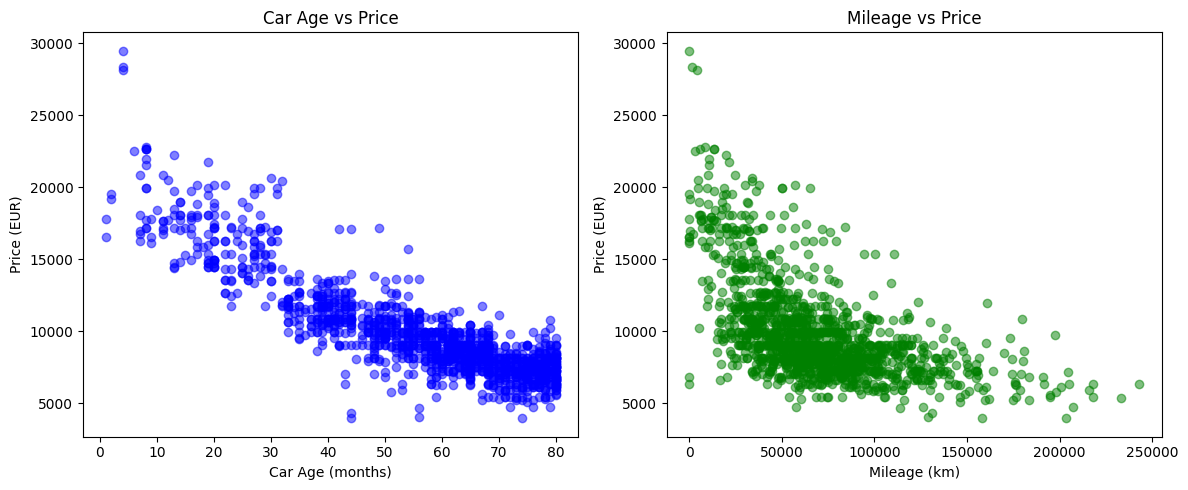

In [20]:
#TODO
plt.figure(figsize=(12, 5))

# Scatter Plot 1: Car Age vs Price
plt.subplot(1, 2, 1) 
plt.scatter(df_cleaned["Age"], df_cleaned["Price"], alpha=0.5, color='blue')
plt.xlabel("Car Age (months)")
plt.ylabel("Price (EUR)")
plt.title("Car Age vs Price")

# Scatter Plot 2: Mileage vs Price
plt.subplot(1, 2, 2)
plt.scatter(df_cleaned["Mileage"], df_cleaned["Price"], alpha=0.5, color='green')
plt.xlabel("Mileage (km)")
plt.ylabel("Price (EUR)")
plt.title("Mileage vs Price")

plt.tight_layout()

# Display the plots
plt.show()


**1.7 (4 pts): Correlation Between Price and Mileage**

The relationship between car price and mileage appears non-linear, with a steeper price drop initially followed by a flatter curve.

A.(2 pts)  Calculate both the Pearson and Spearman correlations between the price of the car and the distance driven.


In [21]:
#TODO
# Compute Pearson correlation
pearson_corr = df_cleaned["Price"].corr(df_cleaned["Mileage"], method="pearson")
print("Pearson Correlation between Price and Mileage:", pearson_corr)

# Compute Spearman correlation
spearman_corr = df_cleaned["Price"].corr(df_cleaned["Mileage"], method="spearman")
print("Spearman Correlation between Price and Mileage:", spearman_corr)


Pearson Correlation between Price and Mileage: -0.5648010913496245
Spearman Correlation between Price and Mileage: -0.6054477630274099



B.(2 pts)  Which correlation value is higher? Does this result align with your expectations?

Your Response:

//**//

The Spearman correlation (-0.6054) is slightly higher (in absolute terms) than the Pearson correlation (-0.5648). This result aligns with the exctations because the relationship between car price and mileage is non-linear. While Pearson's correlation measures the strength of a linear relationship, Spearman's correlation evaluates the strength of a monotonic relationship by ranking the data. In this case, since the price drop is steeper at lower mileage and then flattens out, the rank-based Spearman method captures the non-linear pattern more effectively, resulting in a higher absolute correlation value.

## Part 2 Linear Regression (30 pts)

You want to build a linear regression model to predict the price of a car based on the features you have.



**2.0 (8 pts) Helper functions**

Before building the linear regression model, you need to implement some helper functions.

 Implement the `accuracy` , `precision`, `recall` and `f1_score` functions. 

1. These functions should take in the true labels(`np.array`) and the predicted labels(`np.array`) and return the corresponding metric. 
2. They should follow the convention that the positive class is 1 and the negative class is 0.
3. Apply the functions to the following data:

```python
true_labels = np.array([1, 0, 1, 1, 0, 1, 0, 0, 1, 0])
predicted_labels = np.array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0])
```

- Compare the results with the implementation in `sklearn` and see if they match.

In [22]:
#TODO
def accuracy(true_labels, predicted_labels):
    return np.mean(true_labels == predicted_labels)

def precision(true_labels, predicted_labels):
    tp = np.sum((true_labels == 1) & (predicted_labels == 1))
    fp = np.sum((true_labels == 0) & (predicted_labels == 1))
    return tp / (tp + fp) if (tp + fp) > 0 else 0

def recall(true_labels, predicted_labels):
    tp = np.sum((true_labels == 1) & (predicted_labels == 1))
    fn = np.sum((true_labels == 1) & (predicted_labels == 0))
    return tp / (tp + fn) if (tp + fn) > 0 else 0

def f1_score_custom(true_labels, predicted_labels):
    p = precision(true_labels, predicted_labels)
    r = recall(true_labels, predicted_labels)
    return 2 * (p * r) / (p + r) if (p + r) > 0 else 0


In [23]:
# Given data
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score


true_labels = np.array([1, 0, 1, 1, 0, 1, 0, 0, 1, 0])
predicted_labels = np.array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0])

# Compute metrics using our functions
acc = accuracy(true_labels, predicted_labels)
prec = precision(true_labels, predicted_labels)
rec = recall(true_labels, predicted_labels)
f1 = f1_score_custom(true_labels, predicted_labels)

print("Custom Metrics:")
print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1 Score:", f1)

# Compute metrics using sklearn for comparison
sklearn_acc = accuracy_score(true_labels, predicted_labels)
sklearn_prec = precision_score(true_labels, predicted_labels)
sklearn_rec = recall_score(true_labels, predicted_labels)
sklearn_f1 = f1_score(true_labels, predicted_labels)

print("\nSklearn Metrics:")
print("Accuracy:", sklearn_acc)
print("Precision:", sklearn_prec)
print("Recall:", sklearn_rec)
print("F1 Score:", sklearn_f1)

Custom Metrics:
Accuracy: 0.7
Precision: 0.6666666666666666
Recall: 0.8
F1 Score: 0.7272727272727272

Sklearn Metrics:
Accuracy: 0.7
Precision: 0.6666666666666666
Recall: 0.8
F1 Score: 0.7272727272727273



**2.1 (6 pts) Preprocess the Data**

To prepare your data for building a linear regression model, complete the following steps:

A.(1 pts) Convert the categorical variables to one-hot encoding using the `pd.get_dummies()` function, how many columns do you have after the one-hot encoding? (P.S. You may want to avoid introducing multicollinearity with one-hot encoding, what should you do to avoid this?)


In [24]:
#TODO
# Convert categorical columns to dummy variables; drop_first=True to avoid multicollinearity
df_encoded = pd.get_dummies(df_cleaned, drop_first=True)

# Check how many columns we have after encoding
print("Total number of columns after one-hot encoding:", df_encoded.shape[1])

Total number of columns after one-hot encoding: 11


In [25]:
print("Total number of columns before one-hot encoding:", df_cleaned.shape[1])

Total number of columns before one-hot encoding: 10


In [26]:
print(df_encoded.head().to_markdown())

|    |   Price |   Age |   Mileage |   HP |   MetColor |   Automatic |   CC |   Doors |   Weight | FuelType_Diesel   | FuelType_Petrol   |
|---:|--------:|------:|----------:|-----:|-----------:|------------:|-----:|--------:|---------:|:------------------|:------------------|
|  0 |   13500 |    23 |     46986 |   90 |          1 |           0 | 2000 |       3 |     1165 | True              | False             |
|  1 |   12472 |    23 |     72937 |   90 |          1 |           0 | 2000 |       3 |     1165 | True              | False             |
|  2 |   12652 |    24 |     41711 |   90 |          1 |           0 | 2000 |       3 |     1165 | True              | False             |
|  3 |   13560 |    26 |     48000 |   90 |          0 |           0 | 2000 |       3 |     1165 | True              | False             |
|  4 |   12472 |    30 |     38500 |   90 |          0 |           0 | 2000 |       3 |     1170 | True              | False             |


We should avoid having multicollinearity because it will add redundant information. It will introduce Variables that are linearly dependent, because n - 1, where n is the amount of categories that are One-Hot encoded, are enough to determine the nth column.

B.(1 pts) Split the data into features (X) and target (y) variables. The target variable is the 'Price' column. Then split the data into train test sets using a 80-20 split. Use `random_state=42` for reproducibility. How many samples are in the training set and how many samples are in the test set?


In [27]:
# Alternatively, display rows that have at least one NaN value
print(df_encoded[df_encoded.isna().any(axis=1)])

       Price   Age  Mileage    HP  MetColor  Automatic      CC  Doors  Weight  \
1369  7483.0  80.0      NaN  86.0       0.0        0.0  1300.0    3.0  1015.0   

      FuelType_Diesel  FuelType_Petrol  
1369            False             True  


There is one car for which the mileage is NaN, lets delete it as well.

In [28]:
# Remove rows with any NaN values
df_encoded = df_encoded.dropna()

# Verify removal by checking for NaN values again
print(df_encoded[df_encoded.isna().any(axis=1)])

Empty DataFrame
Columns: [Price, Age, Mileage, HP, MetColor, Automatic, CC, Doors, Weight, FuelType_Diesel, FuelType_Petrol]
Index: []


In [29]:
#TODO
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X = df_encoded.drop('Price', axis=1)
y = df_encoded['Price']

# Split the data into train (80%) and test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print number of samples in train and test sets
print("Number of training samples:", X_train.shape[0])
print("Number of test samples:", X_test.shape[0])

Number of training samples: 1146
Number of test samples: 287


C.(1 pts) Why do we split the data into only train-test sets but not train-validation-test sets? 

Your Response:

//**//

We typically split the data into just train and test sets because the test set is held out to evaluate the final model performance.
Any tuning or validation is done via cross-validation on the training set, which avoids the need for a separate validation set.
Keeping a separate test set ensures an unbiased evaluation of the model’s generalization performance on unseen data.

D.(1 pts) **Standardize the Features**: Use `StandardScaler` from `sklearn.preprocessing` and then add a constant column using `sm.add_constant()`. Print the average and standard deviation of the training set after standardization.

In [30]:
#TODO
from sklearn.preprocessing import StandardScaler

# Initialize and fit the scaler on the training features
scaler = StandardScaler() # Computes the mean and standard deviation from the training data and scales the data accordingly
X_train_scaled = scaler.fit_transform(X_train)

# Convert scaled features back to a DataFrame (for inspection)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)

# Add a constant column for the intercept
X_train_final = sm.add_constant(X_train_scaled_df)

# Print the mean and standard deviation for each feature (excluding the constant column)
print("Feature means (should be close to 0):")
print(np.mean(X_train_final.drop('const', axis=1), axis=0))

print("\nFeature standard deviations (should be close to 1):")
print(np.std(X_train_final.drop('const', axis=1), axis=0))


Feature means (should be close to 0):
Age                1.705055e-16
Mileage           -1.922062e-16
HP                 6.200198e-17
MetColor          -1.550050e-18
Automatic          2.480079e-17
CC                -5.068662e-16
Doors             -3.503112e-16
Weight            -1.918186e-15
FuelType_Diesel   -1.395045e-17
FuelType_Petrol   -1.519049e-16
dtype: float64

Feature standard deviations (should be close to 1):
Age                1.0
Mileage            1.0
HP                 1.0
MetColor           1.0
Automatic          1.0
CC                 1.0
Doors              1.0
Weight             1.0
FuelType_Diesel    1.0
FuelType_Petrol    1.0
dtype: float64


E.(2 pts) Should we first standardize the data and then split it into train and test sets or vice versa?   why?

Your Response:

//**//

We should split the data into train and test sets first, and then standardize using parameters (mean and std) computed only on the training data.
This prevents data leakage—using information from the test set to transform the training data—which can lead to overly optimistic performance estimates.
Once the scaler is fit on the training data, the same transformation is applied to the test data.

**2.2 (10 pts) Train and Evaluate the Linear Regression Model**

To train a linear regression model using and evaluate its performance, follow these steps:

1. (2 pts) Train a linear regression model on the training dataset using `sm.OLS` from `statsmodels`, print the summary of the model using `model.summary()`.


In [31]:
#TODO

# Train the linear regression model using OLS
model = sm.OLS(y_train, X_train_final)
results = model.fit()

# Print the model summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     639.5
Date:                Sun, 16 Feb 2025   Prob (F-statistic):               0.00
Time:                        18:01:05   Log-Likelihood:                -9851.1
No. Observations:                1146   AIC:                         1.972e+04
Df Residuals:                    1135   BIC:                         1.978e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            9901.8482     38.860    2

2. (2 pts) Evaluate the model on the test dataset using the square root of the mean squared error (RMSE) metric. 
   1. Report the RMSE value.
   2. Your boss wants to know how far off the model's predictions are from the actual price of the car. What would you tell him? Given a number and explain how you got it.


In [32]:
#TODO
from sklearn.metrics import mean_squared_error

X_test_scaled = scaler.transform(X_test)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)
X_test_final = sm.add_constant(X_test_scaled_df)

# Predict on the test dataset
y_pred = results.predict(X_test_final)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Test RMSE:", rmse)

Test RMSE: 1291.5676043186113


Your Response:

//**//

The model’s RMSE on the test dataset is approximately 1292 euros. This indicates that, on average, the predictions deviate from the actual car prices by about 1292 euros. This measure was obtained by taking the square root of the mean squared error computed between the actual and predicted prices on the test set.

3. (2 pts) Report the R² score on the test dataset and interpret it.


In [33]:
#TODO
from sklearn.metrics import r2_score

# Calculate R2 score on the test set
r2 = r2_score(y_test, y_pred)
print("Test R² score:", r2)

Test R² score: 0.8464875377006171


Your Response:

//**//

The R² score on the test dataset is 0.8465. This means that about 84.65% of the variability in car prices is explained by our model’s features. A high R² like this indicates that the model has a strong fit and is able to explain most of the variation in the data.

4.  (2 pts) Which features are statistically significant at a 5% significance level? 

In [34]:
#TODO
# Identify statistically significant features (p-value < 0.05)
significant_features = results.pvalues[results.pvalues < 0.05].index.tolist()
print("Statistically significant features at a 5% significance level:", significant_features)

Statistically significant features at a 5% significance level: ['const', 'Age', 'Mileage', 'HP', 'CC', 'Weight', 'FuelType_Diesel', 'FuelType_Petrol']


5.  (2 pts) Determine which two feature have the highest coefficient? What does it imply?

In [35]:
# Drop the constant coefficient and then sort by the absolute value of coefficients
coefficients = results.params.drop('const')
top_two = coefficients.abs().sort_values(ascending=False).head(2)
print("Top two features with highest absolute coefficients:")
print(top_two)

Top two features with highest absolute coefficients:
Age       2140.27232
Weight     871.15309
dtype: float64


Your Response:

//**//

The two features with the highest absolute coefficients are Age and Weight. Age has a coefficient of -2140.27, meaning that as a car gets older, its price tends to decrease significantly. Weight, with a coefficient of 871.15, suggests that heavier cars are generally priced higher. In essence, Age appears to have the strongest impact on car pricing, with a substantial negative effect, while Weight also plays a significant role with a positive association.

**2.3 (2 pts): Improvement Discussion**

- Suggest a few additional features that could potentially explain this remaining variance in the data ( at least 2 features).

Your Response:

//**//

Vehicle Condition / Maintenance History:
Information on a car’s condition — such as accident history, service records, and overall maintenance — can affect its resale value. Cars that have been well maintained or have a documented service history are often priced higher, even when age and mileage are similar.

Number of Previous Owners:
The number of previous owners may indicate how well the car was cared for. Typically, a car with fewer owners is more desirable and can result in a higher price compared to one that has changed hands several times.

**2.4 (2 pts): Identifying Confounding Variables**

The feature "Weight" shows a very low p-value and a high coefficient, but it doesn't seem to be a major factor for customers buying a second-hand car. You go to your mentor Jerasimosu to discuss this issue. Indeed, Jerasimosu suggests that never in his career has he seen a customer who asked for the weight of a car before buying it.
You suspect that there might be a confounding variable that is correlated with the car's weight and significantly influences its price.

- Suggest a possible confounding variable that may be correlated with the car's weight and significantly influence its price (it doesn't need to be a variable in the dataset). Explain why this variable could be a confounding variable.

Your Response:

//**//
Even though our regression shows that Weight has a very low p-value and a high positive coefficient, it is unlikely that customers directly consider the weight of a car when making a purchase. This suggests that Weight may be serving as a proxy for another underlying variable that more directly influences price.

A plausible confounding variable is the vehicle’s size or class. Larger vehicles, such as SUVs or full-size sedans, naturally weigh more and generally command higher prices due to increased interior space, additional features, and enhanced performance. In our dataset, while we don’t have an explicit “Vehicle Class” feature, Weight might be capturing this effect. In other words, heavier cars may simply be larger, and larger cars are more expensive.

If we had a variable like “Vehicle Size” or even “Engine Displacement (CC)” (which is in our dataset and often correlates with size), we could better isolate the effect of vehicle class on price. The positive coefficient for Weight in our current model may therefore reflect that as cars get larger (and heavier), their price tends to be higher—a pattern that aligns with market observations (for example, SUVs are typically more expensive than compact cars).

Correlation between Weight and CC: 0.6523058155491238


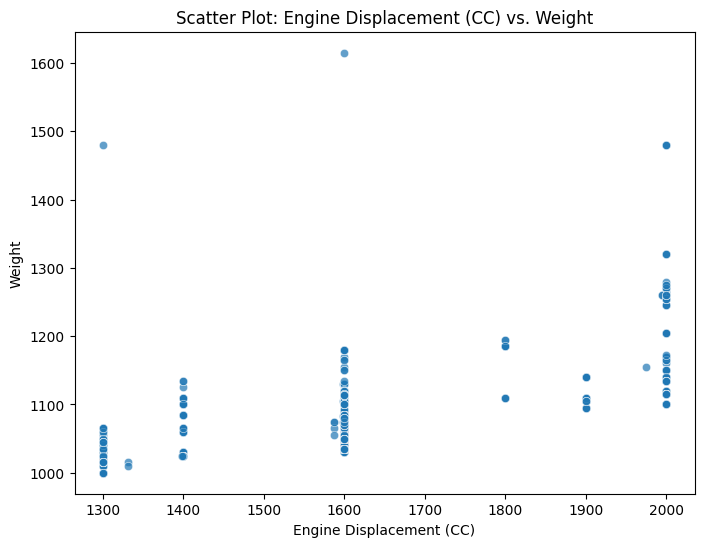

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation between Weight and CC
corr_weight_cc = df_encoded['Weight'].corr(df_encoded['CC'])
print("Correlation between Weight and CC:", corr_weight_cc)

# Create a scatter plot to visualize the relationship
plt.figure(figsize=(8,6))
sns.scatterplot(x='CC', y='Weight', data=df_encoded, alpha=0.7)
plt.title("Scatter Plot: Engine Displacement (CC) vs. Weight")
plt.xlabel("Engine Displacement (CC)")
plt.ylabel("Weight")
plt.show()

**2.5 (2 pts): Adding an Inverse Mileage Term**

From the previous scatter plot, the relationship between car price and mileage appears non-linear, with a steep price drop initially and then a flattening. A suitable approach to model this behavior is by incorporating an inverse term of mileage.

- Add the inverse mileage term to the model and retrain it using the code provided. Print the model summary and interpret the effect of the inverse mileage term.

In [37]:
#TODO
# 1. Create inverse mileage feature.
df_encoded['Inverse_Mileage'] = 1 / df_encoded['Mileage']

# 2. Update feature set (drop Price as target)
X_extended = df_encoded.drop('Price', axis=1)
y_extended = df_encoded['Price']

# 3. Split into train and test sets using the same random_state
X_train_ext, X_test_ext, y_train_ext, y_test_ext = train_test_split(X_extended, y_extended, test_size=0.2, random_state=42)

# 4. Standardize the extended feature set using StandardScaler
scaler_ext = StandardScaler()
X_train_ext_scaled = scaler_ext.fit_transform(X_train_ext)
X_train_ext_scaled_df = pd.DataFrame(X_train_ext_scaled, columns=X_train_ext.columns, index=X_train_ext.index)

# 5. Add a constant for the intercept
X_train_ext_final = sm.add_constant(X_train_ext_scaled_df)

# 6. Train the model with the inverse mileage
model_ext = sm.OLS(y_train_ext, X_train_ext_final)
results_ext = model_ext.fit()

# 7. Print model summary.
print(results_ext.summary())


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     582.4
Date:                Sun, 16 Feb 2025   Prob (F-statistic):               0.00
Time:                        18:01:06   Log-Likelihood:                -9849.8
No. Observations:                1146   AIC:                         1.972e+04
Df Residuals:                    1134   BIC:                         1.978e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            9901.8482     38.833    2

## Part 3 Supervised Learning (40 pts)


After completing your analysis, you're satisfied with the results. You handed the Jupyter notebook over to your mentor.

(Fun fact: The name "Jupyter" is derived from Julia, Python, and R—three programming languages that the platform was originally designed for.)

Your mentor Jerasimosu is very impressed with your work and asks you the following question:

“
This looks great! It will be very useful for our sales team. While looking at the results, I realized that there might be one thing that we can improve. 
For companies like us, it is important to sell the cars quickly. If we are patient, we might be able to sell the car for a higher price, but that’s not always the best strategy. We need to consider the maintenance costs for the car, the cash flow and the fact that the price of the car decreases over time."

He then continues:
"Three months is a sweet spot for us. If we can sell the car within the first three months, it is great. If not, it is worth considering lowering the price to sell it faster and increase our cash flow. I can ask Ivan from Sales to collect data in the last few months on whether the car was sold within the first three months or not. This would be great if you could have a model that tells us if the car will be sold in the first three months or not. "

This sparks your interest, and soon Ivan has provided you with the new data containing an additional column `sold_within_3_months` which is a binary variable indicating whether the car was sold within the first three months or not.

Note: The data for this part is in the file `Task3.ToyotaCorolla_sales_3months.csv` and it has already unified the currency and distance units.

In [53]:
data_df = pd.read_csv('data/Task3.ToyotaCorolla_sales_3months.csv', index_col=0)
print(data_df.head())

   Price  Age     KM FuelType  HP  MetColor  Automatic    CC  Doors  Weight  \
0  13500   23  46986   Diesel  90         1          0  2000      3    1165   
1  13750   23  72937   Diesel  90         1          0  2000      3    1165   
2  13950   24  41711   Diesel  90         1          0  2000      3    1165   
3  14950   26  48000   Diesel  90         0          0  2000      3    1165   
4  13750   30  38500   Diesel  90         0          0  2000      3    1170   

   sold_within_3_months  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0  



**3.1 (2 pts): Preprocess the Data**
- （1 pts）How many cars in the dataset were sold in the first three months, and how many were not? 

In [54]:
#TODO
# Count the number of cars sold vs. not sold within three months
sold_counts = data_df["sold_within_3_months"].value_counts()

print("Cars sold within 3 months (label=1):", sold_counts.get(1, 0))
print("Cars NOT sold within 3 months (label=0):", sold_counts.get(0, 0))

Cars sold within 3 months (label=1): 880
Cars NOT sold within 3 months (label=0): 556


- (1 pts) Preprocess the categorical variables to one-hot encoding using the `pd.get_dummies()` function.

In [55]:
#TODO
# One-hot encode the FuelType column
df_encoded = pd.get_dummies(data_df, columns=['FuelType'], drop_first=True)

# Display the first few rows of the encoded DataFrame
print(df_encoded.head())


   Price  Age     KM  HP  MetColor  Automatic    CC  Doors  Weight  \
0  13500   23  46986  90         1          0  2000      3    1165   
1  13750   23  72937  90         1          0  2000      3    1165   
2  13950   24  41711  90         1          0  2000      3    1165   
3  14950   26  48000  90         0          0  2000      3    1165   
4  13750   30  38500  90         0          0  2000      3    1170   

   sold_within_3_months  FuelType_Diesel  FuelType_Petrol  
0                     0             True            False  
1                     0             True            False  
2                     0             True            False  
3                     0             True            False  
4                     0             True            False  


**3.2 (20 pts):  Logistic Regression Model**
1. (2 pts) Split the data into features (X) and target (y) variables. The target variable is the 'sold_within_3_months' column. The `Price` column should be included as a feature.

In [56]:
#TODO
# Features: All columns except sold_within_3_months (including Price)
X = df_encoded.drop('sold_within_3_months', axis=1)

# Target: sold_within_3_months
y = df_encoded['sold_within_3_months']

print("Feature columns:", X.columns.tolist())
print("Target column:", y.name)


Feature columns: ['Price', 'Age', 'KM', 'HP', 'MetColor', 'Automatic', 'CC', 'Doors', 'Weight', 'FuelType_Diesel', 'FuelType_Petrol']
Target column: sold_within_3_months


2. (2 pts) Then split the data into train test sets using a 80-20 split. Use `random_state=42` for reproducibility. 

In [57]:
#TODO
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Number of training samples:", X_train.shape[0])
print("Number of test samples:", X_test.shape[0])


Number of training samples: 1148
Number of test samples: 288


3. (2 pts) Standardize the features using `StandardScaler` from `sklearn.preprocessing` and then add a constant column using `sm.add_constant()`.

In [58]:
#TODO
# Initialize and fit the scaler on training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert scaled arrays back to DataFrames for clarity
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

# Add a constant for the intercept
X_train_final = sm.add_constant(X_train_scaled_df)
X_test_final = sm.add_constant(X_test_scaled_df)

print("Training data after standardization and adding constant:")
print(X_train_final.head())


Training data after standardization and adding constant:
      const     Price       Age        KM        HP  MetColor  Automatic  \
899     1.0 -0.346662  0.329691 -0.254372 -1.027080 -1.402287  -0.244987   
881     1.0 -0.265137  0.649448 -0.194054  0.590140  0.713121  -0.244987   
310     1.0  0.606773 -0.842750 -0.802147  0.590140  0.713121  -0.244987   
1145    1.0 -1.189554  1.022497  0.875038  0.590140  0.713121  -0.244987   
31      1.0  1.380576 -1.802020 -0.893805 -0.285854  0.713121  -0.244987   

            CC     Doors    Weight  FuelType_Diesel  FuelType_Petrol  
899  -1.409744  1.009250 -0.745518        -0.357353         0.383214  
881   0.168246 -0.040224 -0.745518        -0.357353         0.383214  
310   0.168246  1.009250  0.139056        -0.357353         0.383214  
1145  0.168246  1.009250 -0.057516        -0.357353         0.383214  
31   -0.883747 -1.089698  0.532200        -0.357353         0.383214  


4. (2 pts) Fit a logistic regression model on the training dataset. Feel free to use either `statsmodels` or `sklearn`.

In [59]:
#TODO
# Fit logistic regression using statsmodels
logit_model = sm.Logit(y_train, X_train_final)
logit_results = logit_model.fit()
print(logit_results.summary())

Optimization terminated successfully.
         Current function value: 0.165946
         Iterations 10
                            Logit Regression Results                            
Dep. Variable:     sold_within_3_months   No. Observations:                 1148
Model:                            Logit   Df Residuals:                     1136
Method:                             MLE   Df Model:                           11
Date:                  Sun, 16 Feb 2025   Pseudo R-squ.:                  0.7510
Time:                          18:15:06   Log-Likelihood:                -190.51
converged:                         True   LL-Null:                       -765.10
Covariance Type:              nonrobust   LLR p-value:                1.435e-239
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.3879      0.168     -2.310      0.021      -0.717      -0.0

5. (2 pts) Evaluate the model on the test dataset using the accuracy score metric. Report the accuracy score.

In [60]:
#TODO
# Predict probabilities on the test set
y_pred_prob = logit_results.predict(X_test_final)

# Convert probabilities to binary predictions using threshold 0.5
y_pred = (y_pred_prob >= 0.5).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9305555555555556


6. (2 pts) Calculate the precision, recall, and F1-score.

In [61]:
#TODO

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Precision: 0.9375
Recall: 0.9482758620689655
F1-score: 0.9428571428571428


7. (2 pts) Suppose that your company is running short on cash flow and needs to sell the cars quickly, for example by running some offer (special discount on cars). But which ones? How should you adjust the threshold for the decision boundary of the logistic regression model to ensure that the company can sell the cars as quickly as possible?
    - A. Increase the threshold
    - B. Decrease the threshold

In a more general sense, how does the choice of threshold affect the precision and recall of the model?

Your Response:

//**//

Lowering the threshold will generally increase the recall (more actual positive cases are predicted as positive) but may decrease precision (more false positives).
In a cash-strapped scenario, we might be willing to sacrifice some precision (i.e., some cars flagged as “sell quickly” may not be sold in three months) in order to capture as many opportunities as possible (higher recall), which can improve cash flow.

8. (6 pts) Try to find the optimal threshold that maximizes the F1-score. Implement any kind of method you see fit (e.g. binary search or grid search). What is the optimal threshold and what difference does the optimal threshold make in the F1-score?

If you notice anything odd, report it and try to identify the reasons behind it.

Optimal Threshold: 0.49
Maximum F1-score: 0.9459


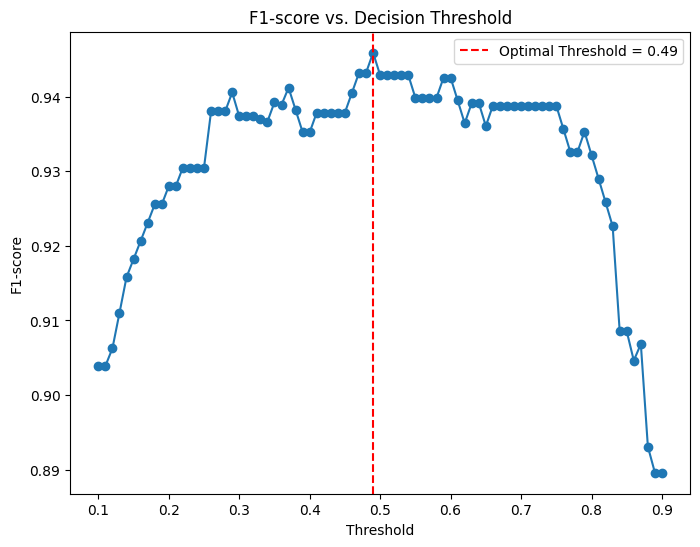

In [62]:
#TODO
# Define a range of thresholds to evaluate
thresholds = np.arange(0.1, 0.91, 0.01)
f1_scores = []

# Get predicted probabilities on the test set (already computed)
y_pred_prob = logit_results.predict(X_test_final)

# Loop over thresholds to compute F1-score at each threshold
for thresh in thresholds:
    y_pred_thresh = (y_pred_prob >= thresh).astype(int)
    f1 = f1_score(y_test, y_pred_thresh)
    f1_scores.append(f1)

# Find the threshold with the maximum F1-score
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]
optimal_f1 = f1_scores[optimal_idx]

print(f"Optimal Threshold: {optimal_threshold:.2f}")
print(f"Maximum F1-score: {optimal_f1:.4f}")

# Optionally, plot the F1-score vs threshold
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(thresholds, f1_scores, marker='o')
plt.xlabel("Threshold")
plt.ylabel("F1-score")
plt.title("F1-score vs. Decision Threshold")
plt.axvline(optimal_threshold, color='red', linestyle='--', label=f"Optimal Threshold = {optimal_threshold:.2f}")
plt.legend()
plt.show()


**3.3(23 pts) Free model exploration**

Use any model from `sklearn` to predict whether a car will be sold within the first three months.

Follow these steps to complete the task:

1. (2 pts) Train your own classifier model to predict the target variable (`sold_within_3_months`).You can reuse the train and test sets from the previous section. Set `random_state=42` for reproducibility if needed. At this stage no need to optimize (yet). That will come at step 4.

In [77]:
#TODO
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest classifier with default hyperparameters
rf_classifier = RandomForestClassifier(random_state=42, n_estimators=100)
rf_classifier.fit(X_train_scaled_df, y_train)


RandomForestClassifier(random_state=42)

2. (2 pts) Evaluate the model on the test set and report on hyperparameters or other details of the algorithm you chose.

In [78]:
#TODO
# Predict on test set
y_pred_rf = rf_classifier.predict(X_test_scaled_df)

# Evaluate performance
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print("Random Forest Baseline Metrics:")
print("Hyperparameters: n_estimators =", rf_classifier.n_estimators, ", random_state =", rf_classifier.random_state)
print("Accuracy: {:.4f}".format(accuracy_rf))
print("Precision: {:.4f}".format(precision_rf))
print("Recall: {:.4f}".format(recall_rf))
print("F1-score: {:.4f}".format(f1_rf))


Random Forest Baseline Metrics:
Hyperparameters: n_estimators = 100 , random_state = 42
Accuracy: 0.9306
Precision: 0.9278
Recall: 0.9598
F1-score: 0.9435


3. (2 pts) Come up with a visualization (could be related to the model or to some variables (e.g. EDA plots) to demonstrate the difficulty (or not) of the problem. 

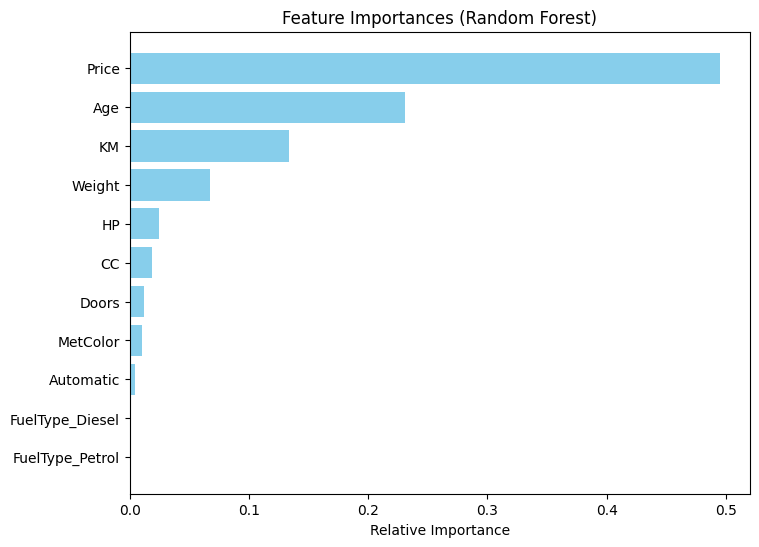

In [ ]:
#TODO
# Retrieve feature importances
importances = rf_classifier.feature_importances_
indices = np.argsort(importances)
feature_names = X_train_scaled_df.columns

plt.figure(figsize=(8, 6))
plt.title("Feature Importances (Random Forest)")
plt.barh(range(len(indices)), importances[indices], color='skyblue', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

4. (17 pts) Try to come up with a model that improves the results both in the previous seciton but also your baseline model in 3.1. Make to sure to properly evaluate the model. No need to provide a visualization here but feel free to add any supporting evidence to your modeling.

Minimally (and for a high-grade) you should consider some form of regularization and proper cross-validation. 

Other things you can consider (in no particular order) are feature engineering, model robustness, hyperparameter tuning, ...

In [81]:
# Make a copy of your original df_encoded to avoid overwriting
df_engineered = df_encoded.copy()

# Add Inverse_Mileage
epsilon = 1e-6  # small constant to avoid division by zero
df_engineered['Inverse_Mileage'] = 1.0 / np.where(df_engineered['KM'] == 0, epsilon, df_engineered['KM'])

# Add Price_to_Age
df_engineered['Price_to_Age'] = df_engineered.apply(
    lambda row: row['Price'] / row['Age'] if row['Age'] > 0 else row['Price'],
    axis=1
)

# Now, re-separate features (X) and target (y)
X_engineered = df_engineered.drop('sold_within_3_months', axis=1)
y_engineered = df_engineered['sold_within_3_months']


In [82]:
# Split again with the same test_size and random_state
X_train_eng, X_test_eng, y_train_eng, y_test_eng = train_test_split(
    X_engineered, y_engineered, test_size=0.2, random_state=42
)

# Standardize
scaler_eng = StandardScaler()
X_train_eng_scaled = scaler_eng.fit_transform(X_train_eng)
X_test_eng_scaled = scaler_eng.transform(X_test_eng)

# Convert to DataFrames for convenience
import pandas as pd
X_train_eng_scaled_df = pd.DataFrame(X_train_eng_scaled, columns=X_train_eng.columns, index=X_train_eng.index)
X_test_eng_scaled_df = pd.DataFrame(X_test_eng_scaled, columns=X_test_eng.columns, index=X_test_eng.index)


In [83]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid_rf = {
    'n_estimators': [100, 300],
    'max_depth': [5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': ['sqrt', 'log2']
}

rf_model = RandomForestClassifier(random_state=42)

grid_rf = GridSearchCV(
    rf_model,
    param_grid_rf,
    cv=5,  # 5-fold cross-validation
    scoring='f1',  # optimizing for F1-score
    n_jobs=-1  # use all available cores
)

grid_rf.fit(X_train_eng_scaled_df, y_train_eng)

print("Best Parameters (RF):", grid_rf.best_params_)
print("Best CV F1 (RF): {:.4f}".format(grid_rf.best_score_))

# Evaluate on the test set
y_pred_rf_tuned = grid_rf.predict(X_test_eng_scaled_df)
accuracy_rf_tuned = accuracy_score(y_test_eng, y_pred_rf_tuned)
precision_rf_tuned = precision_score(y_test_eng, y_pred_rf_tuned)
recall_rf_tuned = recall_score(y_test_eng, y_pred_rf_tuned)
f1_rf_tuned = f1_score(y_test_eng, y_pred_rf_tuned)

print("\nRandom Forest (Tuned + New Features) on Test Set:")
print("Accuracy: {:.4f}".format(accuracy_rf_tuned))
print("Precision: {:.4f}".format(precision_rf_tuned))
print("Recall: {:.4f}".format(recall_rf_tuned))
print("F1-score: {:.4f}".format(f1_rf_tuned))


c:\Users\Pavel Detvan\anaconda3\envs\cuda_test\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters (RF): {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 300}
Best CV F1 (RF): 0.9436

Random Forest (Tuned + New Features) on Test Set:
Accuracy: 0.9306
Precision: 0.9326
Recall: 0.9540
F1-score: 0.9432


In [84]:
from sklearn.ensemble import GradientBoostingClassifier

param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'subsample': [0.8, 1.0]  # partial usage of data per tree
}

gb_model = GradientBoostingClassifier(random_state=42)

grid_gb_extended = GridSearchCV(
    gb_model,
    param_grid_gb,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

grid_gb_extended.fit(X_train_eng_scaled_df, y_train_eng)

print("Best Parameters (GB):", grid_gb_extended.best_params_)
print("Best CV F1 (GB): {:.4f}".format(grid_gb_extended.best_score_))

# Test set evaluation
y_pred_gb_tuned = grid_gb_extended.predict(X_test_eng_scaled_df)
accuracy_gb_tuned = accuracy_score(y_test_eng, y_pred_gb_tuned)
precision_gb_tuned = precision_score(y_test_eng, y_pred_gb_tuned)
recall_gb_tuned = recall_score(y_test_eng, y_pred_gb_tuned)
f1_gb_tuned = f1_score(y_test_eng, y_pred_gb_tuned)

print("\nGradient Boosting (Tuned + New Features) on Test Set:")
print("Accuracy: {:.4f}".format(accuracy_gb_tuned))
print("Precision: {:.4f}".format(precision_gb_tuned))
print("Recall: {:.4f}".format(recall_gb_tuned))
print("F1-score: {:.4f}".format(f1_gb_tuned))


Best Parameters (GB): {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100, 'subsample': 1.0}
Best CV F1 (GB): 0.9442

Gradient Boosting (Tuned + New Features) on Test Set:
Accuracy: 0.9271
Precision: 0.9274
Recall: 0.9540
F1-score: 0.9405


In [85]:
y_prob_gb = grid_gb_extended.predict_proba(X_test_eng_scaled_df)[:, 1]

thresholds = np.linspace(0.1, 0.9, 17)  # from 0.1 to 0.9 in steps of 0.05
best_thresh = 0.5
best_f1 = 0

for thresh in thresholds:
    y_pred_thresh = (y_prob_gb >= thresh).astype(int)
    score = f1_score(y_test_eng, y_pred_thresh)
    if score > best_f1:
        best_f1 = score
        best_thresh = thresh

print(f"Best threshold for F1: {best_thresh:.2f}, F1-score: {best_f1:.4f}")

Best threshold for F1: 0.45, F1-score: 0.9405


## Part 4 The Aftermath (5 pts)

Machine learning models are often evaluated based on accuracy, precision and recall, but these metrics do not always capture fairness. Fairness is a broader concept that depends on the context of the dataset and the decisions influenced by the model.

For this last question, you are asked to reflect on what fairness means in the context of this problem. More specifically, identify potential fairness concerns (at least 2) and suggest how they could be measured or mitigated.
Explain why fairness matters (or doesn’t) in this specific context.

*Hint: Think of the whole pipeline of data science: data collection, modeling, evaluation and identify sources of where the model might be unfair.*


Your Response:

//**//